# CIFAR
En este problema resolveremos CIFAR utilizando una red neuronal convolucional (CNN)

## Paso 1. Cargar información

In [17]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Paso 2 y 3. Comprender la información y modificarla.

En la siguiente celda vamos a visualizar el dataset

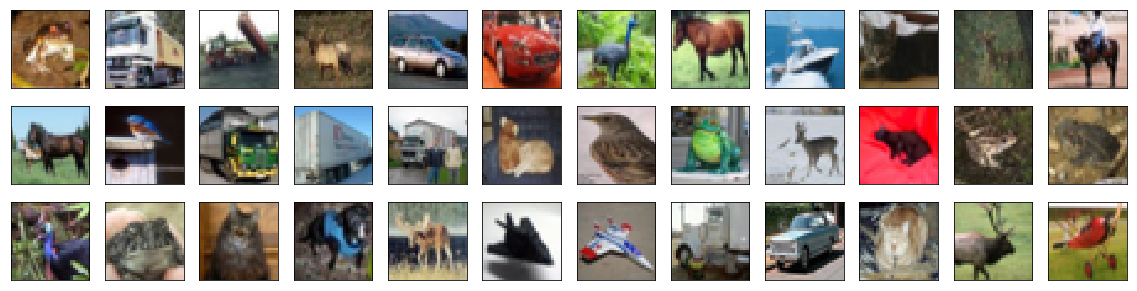

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### Escalamos las imágenes para que vayan de 0 a 1 en vez de 0 a 255

In [19]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### Hacemos One-hot encoding del label

In [20]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Separamos el training set en training y validation. Esto es un paso nuevo

In [21]:
# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


## Paso 4. Construimos arquitectura del modelo
Sigue los pasos explicados en los comentarios

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#TODO: Definir el modelo

# Empezar con capa secuencial
model = Sequential()

# Agrega una capa Convolucional con las siguientes propiedades:
    # 16 filtros de 2x2
    # Padding de same, no nos importan los pixeles de los bordes
    # Con función de activación ReLU
    # ¿De qué tamaño es una imagen de color? (son 3 dimensiones, revisa su tamaño antes)
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))

# No cambies esta capa, la explicaremos en la siguiente sesión
model.add(MaxPooling2D(pool_size=2))

# Agrega una capa Convolucional con las siguientes propiedades:
    # 32 filtros de 2x2
    # Padding de same, no nos importan los pixeles de los bordes
    # Con función de activación ReLU
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

# No cambies esta capa, la explicaremos en la siguiente sesión
model.add(MaxPooling2D(pool_size=2))

# Agrega una capa Convolucional con las siguientes propiedades:
    # 64 filtros de 2x2
    # Padding de same, no nos importan los pixeles de los bordes
    # Con función de activación ReLU
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Agrega una capa Dropout
model.add(Dropout(0.3))

# Agrega una capa para aplanar. No necesitas especificar ningún argumento
model.add(Flatten())

# Agrega una capa densa de 500 neuronas con activación ReLU. Agrega un Dropout después
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

# Agrega una capa densa con 10 neuronas (10 clases) y con activación Softmax
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)          0         
__________

In [23]:
#TODO: Compila el modelo con categorical_crossentropy y RMSProp
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Paso 5. Entrenamos el modelo
No tienes que cambiar el código, pero entiende qué es lo que está ocurriendo. Se tardará aproximadamente 15 minutos. ¡Wooh!

In [24]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=1, write_graph=True, write_images=True)


hist = model.fit(x_train, y_train, batch_size=32, epochs=10,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer, tbCallBack], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.41382, saving model to model.weights.best.hdf5
 - 69s - loss: 1.6156 - acc: 0.4142 - val_loss: 1.4138 - val_acc: 0.4932
Epoch 2/10

Epoch 00002: val_loss improved from 1.41382 to 1.16249, saving model to model.weights.best.hdf5
 - 67s - loss: 1.3018 - acc: 0.5344 - val_loss: 1.1625 - val_acc: 0.5882
Epoch 3/10

Epoch 00003: val_loss improved from 1.16249 to 1.06112, saving model to model.weights.best.hdf5
 - 65s - loss: 1.1780 - acc: 0.5824 - val_loss: 1.0611 - val_acc: 0.6238
Epoch 4/10

Epoch 00004: val_loss did not improve
 - 77s - loss: 1.1062 - acc: 0.6095 - val_loss: 1.1843 - val_acc: 0.6010
Epoch 5/10

Epoch 00005: val_loss improved from 1.06112 to 0.93451, saving model to model.weights.best.hdf5
 - 87s - loss: 1.0560 - acc: 0.6307 - val_loss: 0.9345 - val_acc: 0.6728
Epoch 6/10

Epoch 00006: val_loss improved from 0.93451 to 0.90479, saving model to model.weights.best.hdf5


## Paso 6. Cargamos el mejor modelo y lo evaluamos

In [ ]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

## Paso 7. Visualizamos las predicciones

In [ ]:
# Predecimos en el testing set
y_hat = model.predict(x_test)

# Definimos labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Creamos un plot. Sólo entiende la idea en general
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))